In [9]:
# Base libraries
import numpy as np
import pandas as pd
import time
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

In [10]:
# Visualization
import matplotlib as mpl
import seaborn as sns
sns.set()

In [11]:
# Preprocessing
from sklearn.preprocessing import LabelEncoder
# ML Metrics
from sklearn.metrics import make_scorer, accuracy_score
# ML Model selection
from sklearn.model_selection import train_test_split, GridSearchCV
# CatBoost model
from catboost import CatBoostClassifier

In [12]:
# Extract data from files
train_csv = pd.read_csv("./train.csv")
y_train= train_csv["Transported"].copy()
X_train  = train_csv.drop(["Transported"], axis=1)
test_csv = pd.read_csv("./test.csv")
X_test = test_csv.copy()

In [13]:
train_csv.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [14]:
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [15]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
dtypes: float64(6), object(7)
memory usage: 883.0+ KB


In [16]:
data_types = X_train.dtypes
data_types

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
dtype: object

/var/folders/vz/kf68k5_j6hd4t2j9tq9pvtgc0000gn/T/ipykernel_10439/809347184.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(X_train.corr(), cmap='YlGnBu', annot=True)


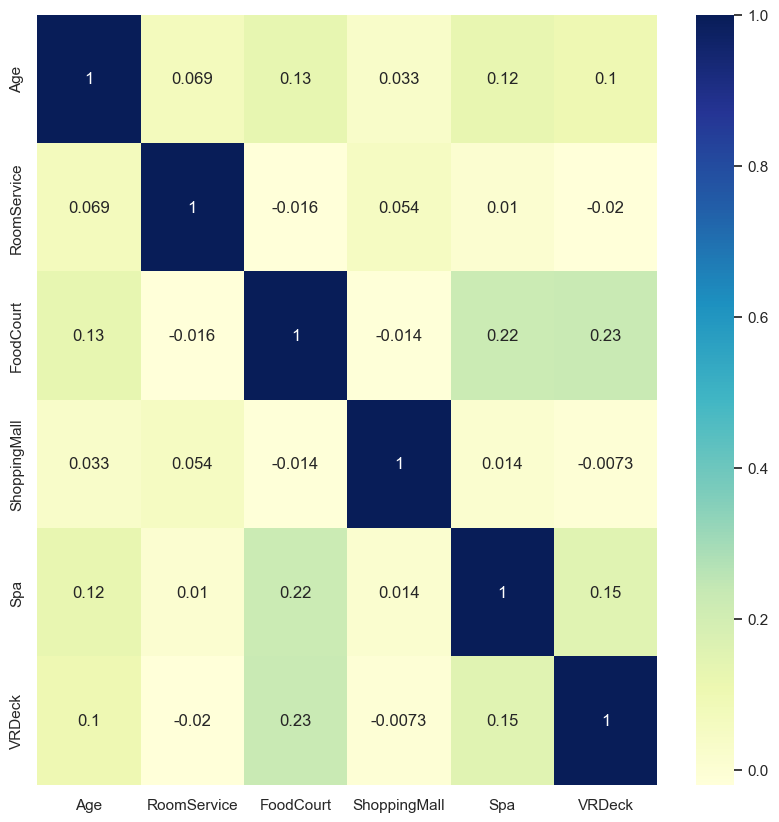

In [17]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(X_train.corr(), cmap='YlGnBu', annot=True)
plt.show()

In [18]:
def show_missing_values_tables(actual_train, actual_test):
    missing_values_table1 = pd.concat([actual_train.isnull().sum(), 100 * actual_train.isnull().sum() / len(actual_train), actual_train.dtypes], axis=1)
    missing_values_table1 = missing_values_table1.rename(columns = {0 : 'Missing Values', 1 : 'Percentage', 2 : 'Data Types'})
    missing_values_table2 = pd.concat([actual_test.isnull().sum(), 100 * actual_test.isnull().sum() / len(actual_test), actual_test.dtypes], axis=1)
    missing_values_table2 = missing_values_table2.rename(columns = {0 : 'Missing Values', 1 : 'Percentage', 2 : 'Data Types'})        
    display(missing_values_table1,missing_values_table2 )
    

In [19]:
show_missing_values_tables(X_train,X_test)

,Missing Values,Percentage,Data Types
PassengerId,0,0.000000,object
HomePlanet,201,2.312205,object
CryoSleep,217,2.496261,object
Cabin,199,2.289198,object
Destination,182,2.093639,object
Age,179,2.059128,float64
VIP,203,2.335212,object
RoomService,181,2.082135,float64
FoodCourt,183,2.105142,float64
ShoppingMall,208,2.392730,float64


,Missing Values,Percentage,Data Types
PassengerId,0,0.000000,object
HomePlanet,87,2.034136,object
CryoSleep,93,2.174421,object
Cabin,100,2.338087,object
Destination,92,2.151040,object
Age,91,2.127660,float64
VIP,93,2.174421,object
RoomService,82,1.917232,float64
FoodCourt,106,2.478373,float64
ShoppingMall,98,2.291326,float64


In [213]:
#Feature engineering

In [20]:
def feature_engineering(actual):
    new = actual.copy()
    # Name
    new['first_name'] = new['Name'].str.split(" ", expand=True)[0]
    new['last_name'] = new['Name'].str.split(" ", expand=True)[1]
    # Cabin    
    new['block'] = new['Cabin'].str.split("/", expand=True)[0]
    new['num'] = new['Cabin'].str.split("/", expand=True)[1]
    new['block2'] = new['Cabin'].str.split("/", expand=True)[2]
    
    # PassengerId  
    new[["Group", 'N_Passenger']] = new["PassengerId"].str.split('_', expand=True).astype('int')
    #Drop Cabin and Name
    new.drop(["PassengerId",'Cabin', 'Name'], axis=1, inplace=True)
    #nan replace
    new = new.apply(lambda x: x.replace('nan', np.nan)) 
    
    return new

In [21]:
X_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines


In [22]:
X_train = feature_engineering(X_train)
X_train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,first_name,last_name,block,num,block2,Group,N_Passenger
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham,Ofracculy,B,0,P,1,1
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna,Vines,F,0,S,2,1
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark,Susent,A,0,S,3,1
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam,Susent,A,0,S,3,2
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy,Santantines,F,1,S,4,1


In [23]:
X_train.isna().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
first_name      200
last_name       200
block           199
num             199
block2          199
Group             0
N_Passenger       0
dtype: int64

In [24]:
#Cleaning the data

In [25]:
def fill_missing(actual): 
    new = actual.copy()
    numeric_tmp = new.select_dtypes(include = np.number)
    categ_tmp = new.select_dtypes(exclude = np.number)

    for col in numeric_tmp.columns:
        new[col] = new[col].fillna(value = new[col].median())
        
    for col in categ_tmp.columns:
        new[col] = new[col].fillna(value = new[col].mode()[0])

    
    return new

In [26]:
X_train = fill_missing(X_train)

In [27]:
X_train.isna().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
first_name      0
last_name       0
block           0
num             0
block2          0
Group           0
N_Passenger     0
dtype: int64

In [28]:
y_train=y_train.replace({True:1,False:0})
y_train.head(5)

0    0
1    1
2    0
3    0
4    1
Name: Transported, dtype: int64

In [29]:
cat_features_train = [X_train.columns.get_loc(col) for col in X_train.select_dtypes(include=['object']).columns]
cat_features_train

[0, 2, 10, 11, 12, 13, 14]

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, train_size=0.8, random_state=42)

In [ ]:
#CatBoost

In [31]:
model=CatBoostClassifier(iterations=2000,
                         eval_metric='Accuracy',
                        verbose=1)

In [32]:
model.fit(
    X_train, y_train,
    cat_features=cat_features_train,
    eval_set=(X_validation, y_validation),
    verbose=False
#     plot=True
)

In [274]:
from sklearn.metrics import accuracy_score
pred=model.predict(X_validation)
print(accuracy_score(y_validation,pred))

0.8136860264519838


In [266]:
# DATA TEST

In [33]:
test_csv = pd.read_csv("./test.csv")
X_test = test_csv.copy()

In [34]:
X_test  = feature_engineering(X_test)
X_test  = fill_missing(X_test )

In [35]:
cat_features_train = [X_test.columns.get_loc(col) for col in X_test.select_dtypes(include=['object']).columns]
cat_features_train

[0, 2, 10, 11, 12, 13, 14]

In [36]:
data_for_id = pd.read_csv("./test.csv")
submission =data_for_id[["PassengerId"]]
submission["Transported"] = model.predict(X_test )
submission["Transported"].replace({0:False, 1:True}, inplace=True)
submission

/var/folders/vz/kf68k5_j6hd4t2j9tq9pvtgc0000gn/T/ipykernel_10439/558687465.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission["Transported"] = model.predict(X_test )
/var/folders/vz/kf68k5_j6hd4t2j9tq9pvtgc0000gn/T/ipykernel_10439/558687465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission["Transported"].replace({0:False, 1:True}, inplace=True)


,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True


In [37]:
submission.to_csv('submission.csv', index=None)